# Objetivo

Evaluar y comparar los modelos de regresión lineal simple y polinomial de segunda y quinta potencia con datos de Adverstising_WEB.csv y programación Python.

# Descripción

Se cargan los datos de la dirección:<https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv>

Los datos contienen variables que en el contexto se interpreta que son inversiones hechas de una empresa y las ventas de la misma, a tanta inversión de marketing en medios tales como TV, Radio, *NewsPapers* (medios impresos) y *Web* (digital) existe en relacuón a las ventas (*Sales*) generadas.

Se trata de comparar modelos predictivos para evaluar cuál es mejor con respecto a los estadísticos *R Square* y *RMSE*.

Las variables de interés serán:

-   **TV** como variable independiente o la variable explicativa hacia la variables *Sales*

-   **Sales** como variable dependiente que es la variable a predecir.

-   Se construyen datos de entrenamiento y datos de validacion al 70 y 30% respectivamente

Se construyen el modelo de regresión lineal simple con los datos de entrenamiento y se evaluán los siguiente aspectos:

-   Se identifican los coeficientes a y b

-   Se analizan los niveles de confianza de los coeficientes.

-   Se identifica el valor de *R Square* par evaluar el grado de explicación de la variable dependiente con respecto a la variable independiente. El modelo **se acepta si está por encima del 60%.**

-   Se hacen prediciones con la funcion *predict()* con los datos de validación.

-   Se mide el valor de *RMSE Root Mean Stándar Error.*

Se construye el modelo polinomial a la segunda potencia y quinta potencia con los datos de entrenamiento y se evalúan los siguientes aspectos.

-   Se identifican los coeficientes

-   Se analizan los niveles de confianza de los coeficientes.

-   Se identifica el valor de *R Square* para evaluar el grado de explicación de la variable independiente con respecto a la variable dependiente. **Se acepta si está por encima del 60%**

-   Se hacen predicciones con la función *predict()* con los datos de validación.

-   Se mide el valor de *rmse Root Mean Stándar Error.*

-   Para trabajar con código Python, se deben cargan las librerías de *Python* previamente instaladas con la función *py_install()* de la librería *reticulate* de R. La función *repl_python()* se utiliza para ejecutar ventana de comando o *shell* de *Python.*

-   *py_install(packages = "pandas")*

-   *py_install(packages = "matplotlib")*

-   py_install(packages = "numpy")

-   py_install(packages = "sklearn")

# Desarrollo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv", encoding='latin1')

In [3]:
datos.head(10)


,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
5,6,6,8.7,48.9,75.0,22.072395,7.2
6,7,7,57.5,32.8,23.5,246.811598,11.8
7,8,8,120.2,19.6,11.6,229.971459,13.2
8,9,9,8.6,2.1,1.0,144.617385,4.8
9,10,10,199.8,2.6,21.2,111.272264,10.6


In [4]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (200, 7)
Columnas y tipo de dato


Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object

In [5]:
datos['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [6]:
datos['Sales'].describe()


count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

### Dispersión de los datos

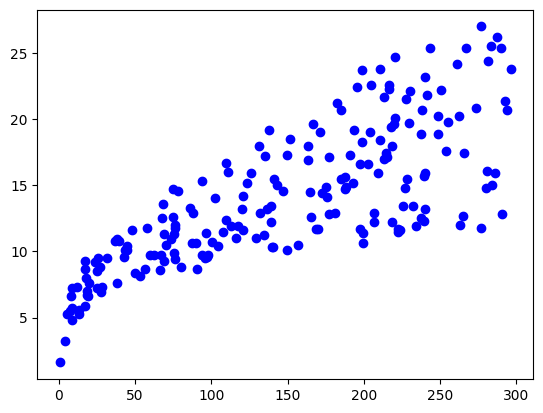

In [7]:
plt.plot(datos['TV'], datos['Sales'], 'o', color= 'blue')


### Construir Datos de entrenamiento y validación

In [8]:
TV = datos[['TV']].to_numpy()
Sales = datos[['Sales']].to_numpy()

In [9]:
TV_train, TV_test, Sales_train, Sales_test = train_test_split(TV, Sales, test_size=0.3, random_state=1287)

In [10]:
TV_train.shape
TV_test.shape

(60, 1)

In [11]:
TV_train[1:10]
TV_test[1:10]

array([[137.9],
       [164.5],
       [ 18.7],
       [220.5],
       [109.8],
       [187.8],
       [165.6],
       [250.9],
       [ 17.2]])

## Modelo de regresión lineal simple

In [12]:
modelo_ls = LinearRegression()
modelo_ls.fit(TV_train, Sales_train)

LinearRegression()

In [13]:
a = modelo_ls.intercept_
b = modelo_ls.coef_
print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [7.03571131]
Valor de b;  [[0.04829686]]


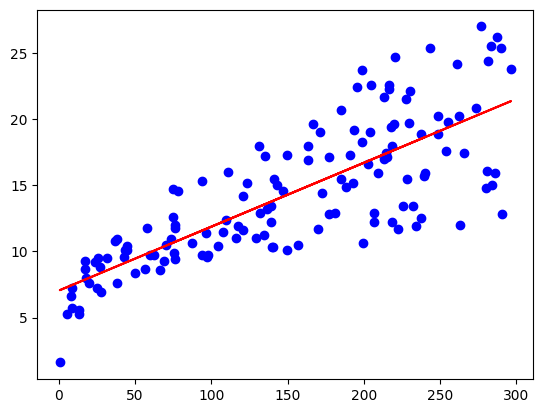

In [14]:
linea_tendencia = modelo_ls.predict(TV_train)
plt.plot(TV_train, Sales_train, 'o', color= 'blue')
plt.plot(TV_train, linea_tendencia, color="red")

In [15]:
TV_train[1:10]
predicciones = modelo_ls.predict(TV_test)
predicciones[1:10]

array([[13.69584841],
       [14.9805449 ],
       [ 7.93886261],
       [17.68516911],
       [12.33870662],
       [16.10586176],
       [15.03367145],
       [19.15339367],
       [ 7.86641732]])

In [16]:
diccionario = {'TV': TV_test.flatten().tolist(),
                'Real' : Sales_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario
comparaciones = pd.DataFrame(diccionario)
comparaciones

,TV,Real,Predicho
0,80.2,8.8,10.909120
1,137.9,19.2,13.695848
2,164.5,14.5,14.980545
3,18.7,6.7,7.938863
4,220.5,20.1,17.685169
5,109.8,16.7,12.338707
6,187.8,15.6,16.105862
7,165.6,12.6,15.033671
8,250.9,22.2,19.153394
9,17.2,5.9,7.866417


In [17]:
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )
# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.5785
R Square : 0.5704892150134101


In [18]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Sales_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))


Mean Squared Error: MSE 11.335071183977375
Root Mean Squared Error RMSE: 3.3667597455086358


In [19]:
rmse = []
rmse.append(np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))
rmse

[3.3667597455086358]

## Modelo de regresión polinomial de segundo nivel

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 2)
TV_poly = poly_reg.fit_transform(TV_train)
modelo_poly2 = LinearRegression()
modelo_poly2.fit(TV_poly, Sales_train)

LinearRegression()

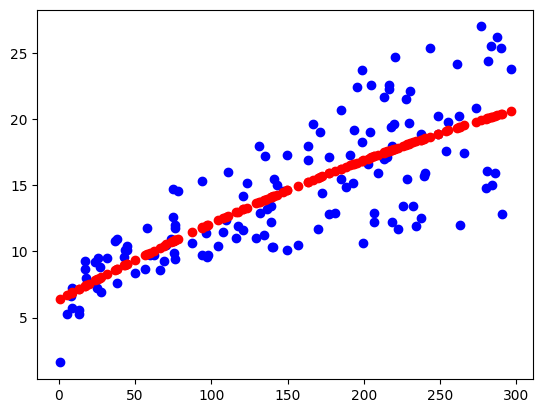

In [21]:
curva_tendencia = modelo_poly2.predict(poly_reg.fit_transform(TV_train))
plt.scatter(TV_train, Sales_train, color = 'b', )
plt.scatter(TV_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

In [22]:
predicciones = modelo_poly2.predict(poly_reg.fit_transform(TV_test))
predicciones

array([[11.05406129],
       [14.04623562],
       [15.3167336 ],
       [ 7.50877973],
       [17.76680584],
       [12.62943921],
       [16.37314379],
       [15.36779309],
       [18.96927591],
       [ 7.41771968],
       [19.56609733],
       [14.70440052],
       [20.50667016],
       [16.14194973],
       [18.47784602],
       [18.54062103],
       [ 8.7489508 ],
       [16.80171605],
       [ 9.26098733],
       [17.36423111],
       [13.44053544],
       [10.7850618 ],
       [19.91937029],
       [16.80171605],
       [15.49723235],
       [20.4828949 ],
       [16.37756409],
       [16.89664392],
       [15.83111798],
       [11.35322134],
       [11.4936196 ],
       [ 8.10429453],
       [17.84459023],
       [18.03953617],
       [17.36003326],
       [11.88962054],
       [10.3184937 ],
       [12.78950468],
       [18.55236366],
       [ 7.51484263],
       [ 6.81124191],
       [ 9.56001855],
       [ 7.55119962],
       [10.40231212],
       [18.61484337],
       [ 6

In [23]:
diccionario = {'TV': TV_test.flatten().tolist(),
                'Real' : Sales_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario
comparaciones = pd.DataFrame(diccionario)
comparaciones.head(10)

,TV,Real,Predicho
0,80.2,8.8,11.054061
1,137.9,19.2,14.046236
2,164.5,14.5,15.316734
3,18.7,6.7,7.508780
4,220.5,20.1,17.766806
5,109.8,16.7,12.629439
6,187.8,15.6,16.373144
7,165.6,12.6,15.367793
8,250.9,22.2,18.969276
9,17.2,5.9,7.417720


In [24]:
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )
# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.592
R Square : 0.5840901478872074


In [25]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Sales_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))

Mean Squared Error: MSE 10.97613364927076
Root Mean Squared Error RMSE: 3.3130248488761387


In [26]:
rmse.append(np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))
rmse

[3.3667597455086358, 3.3130248488761387]

## Modelo de regresión polinomial de quinto nivel


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 5)
TV_poly = poly_reg.fit_transform(TV_train)
modelo_poly5 = LinearRegression()
modelo_poly5.fit(TV_poly, Sales_train)

LinearRegression()

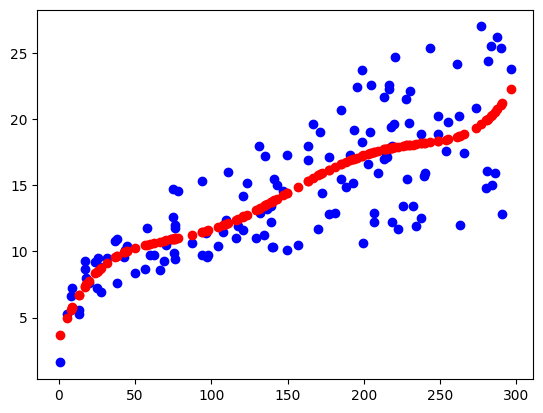

In [28]:
curva_tendencia = modelo_poly5.predict(poly_reg.fit_transform(TV_train))
plt.scatter(TV_train, Sales_train, color = 'b', )
plt.scatter(TV_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

In [29]:
predicciones = modelo_poly5.predict(poly_reg.fit_transform(TV_test))
predicciones

array([[11.06473206],
       [13.65223194],
       [15.39004818],
       [ 7.6279614 ],
       [17.86845037],
       [12.08223462],
       [16.73017066],
       [15.46000177],
       [18.3860714 ],
       [ 7.39171729],
       [18.92578361],
       [14.54053215],
       [21.71750742],
       [16.46258418],
       [18.1672883 ],
       [18.19132705],
       [ 9.74145023],
       [17.17199388],
       [10.18981985],
       [17.62883376],
       [12.90904035],
       [10.94668848],
       [19.57363206],
       [17.17199388],
       [15.63589618],
       [21.59432913],
       [16.7351016 ],
       [17.25925522],
       [16.0764402 ],
       [11.20863182],
       [11.28236389],
       [ 8.86991056],
       [17.90727151],
       [17.99585754],
       [17.62596396],
       [11.5169862 ],
       [10.75168205],
       [12.22833843],
       [18.19587747],
       [ 7.64321316],
       [ 5.43778532],
       [10.38401597],
       [ 7.73344629],
       [10.78685614],
       [18.22048864],
       [ 5

In [30]:
diccionario = {'TV': TV_test.flatten().tolist(),
                'Real' : Sales_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario
comparaciones = pd.DataFrame(diccionario)
comparaciones.head(10)

,TV,Real,Predicho
0,80.2,8.8,11.064732
1,137.9,19.2,13.652232
2,164.5,14.5,15.390048
3,18.7,6.7,7.627961
4,220.5,20.1,17.868450
5,109.8,16.7,12.082235
6,187.8,15.6,16.730171
7,165.6,12.6,15.460002
8,250.9,22.2,18.386071
9,17.2,5.9,7.391717


In [31]:
# Con lo real vs predicciones
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )
# con r2_score([2, 5, 9], [3, 5, 11])
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.5954
R Square : 0.5860668081613637


In [32]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Sales_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))

Mean Squared Error: MSE 10.923968288825149
Root Mean Squared Error RMSE: 3.3051427032467373


In [33]:
rmse.append(np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))
rmse

[3.3667597455086358, 3.3130248488761387, 3.3051427032467373]

# Interpretación

De acuerdo al valor de la métrica RMSE se puede observar que el mejor modelo es el de regresión polinomial de quinto nivel, seguido del modelo de regresión polinomial de segundo nivel y por último el modelo de regresión lineal simple debido a que el valor de RMSE es menor. El valor de R2 es mayor para el modelo de regresión polinomial de quinto nivel, seguido del modelo de regresión polinomial de segundo nivel y por último el modelo de regresión lineal simple debido a que el valor de R2 es mayor.
